Home-made VQE test file

1. VQE with UCCSD ansatz and sto-3g basis set

In [1]:
from pyscf import gto
from qc_practice import VQE
from qc_practice.ansatz import UCCSD
from qc_practice.simulator import QASM

mol = gto.M(atom = 'H 0 0 0; H 0 0 0.75', basis = 'sto-3g')
vqe = VQE(mol)
vqe.ansatz = UCCSD()
vqe.simulator = QASM()
vqe.parallel = True
vqe.run()

Computing Hamiltonian...... Done
SCF Electronic Energy: -1.821721063498602
SCF Total Energy:      -1.116151448938602


Starting VQE Calculation

Ansatz: UCCSD
Optimizer: powell

Iteration: 1
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.822030075110784

Iteration: 2
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.720760163463311

Iteration: 3
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... 

2. VQE with UpCCGSD and 4-31g basis set

In [ ]:
from pyscf import gto
from qc_practice import VQE
from qc_practice.ansatz import UCCSD, UpCCGSD

mol = gto.M(atom = 'H 0 0 0; H 0 0 0.7', basis = '4-31g')
vqe = VQE(mol, UpCCGSD())
vqe.parallel = True
vqe.run()


Computing Hamiltonian...... Done
SCF Electronic Energy: -1.882090604603232
SCF Total Energy:      -1.126123160431803


Starting VQE Calculation

Ansatz: UpCCGSD
Optimizer: powell

Iteration: 1
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.883072093117887

Iteration: 2
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.820036613708572

Iteration: 3
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... 

KeyboardInterrupt: 

3. Total Spin Measurement testing code

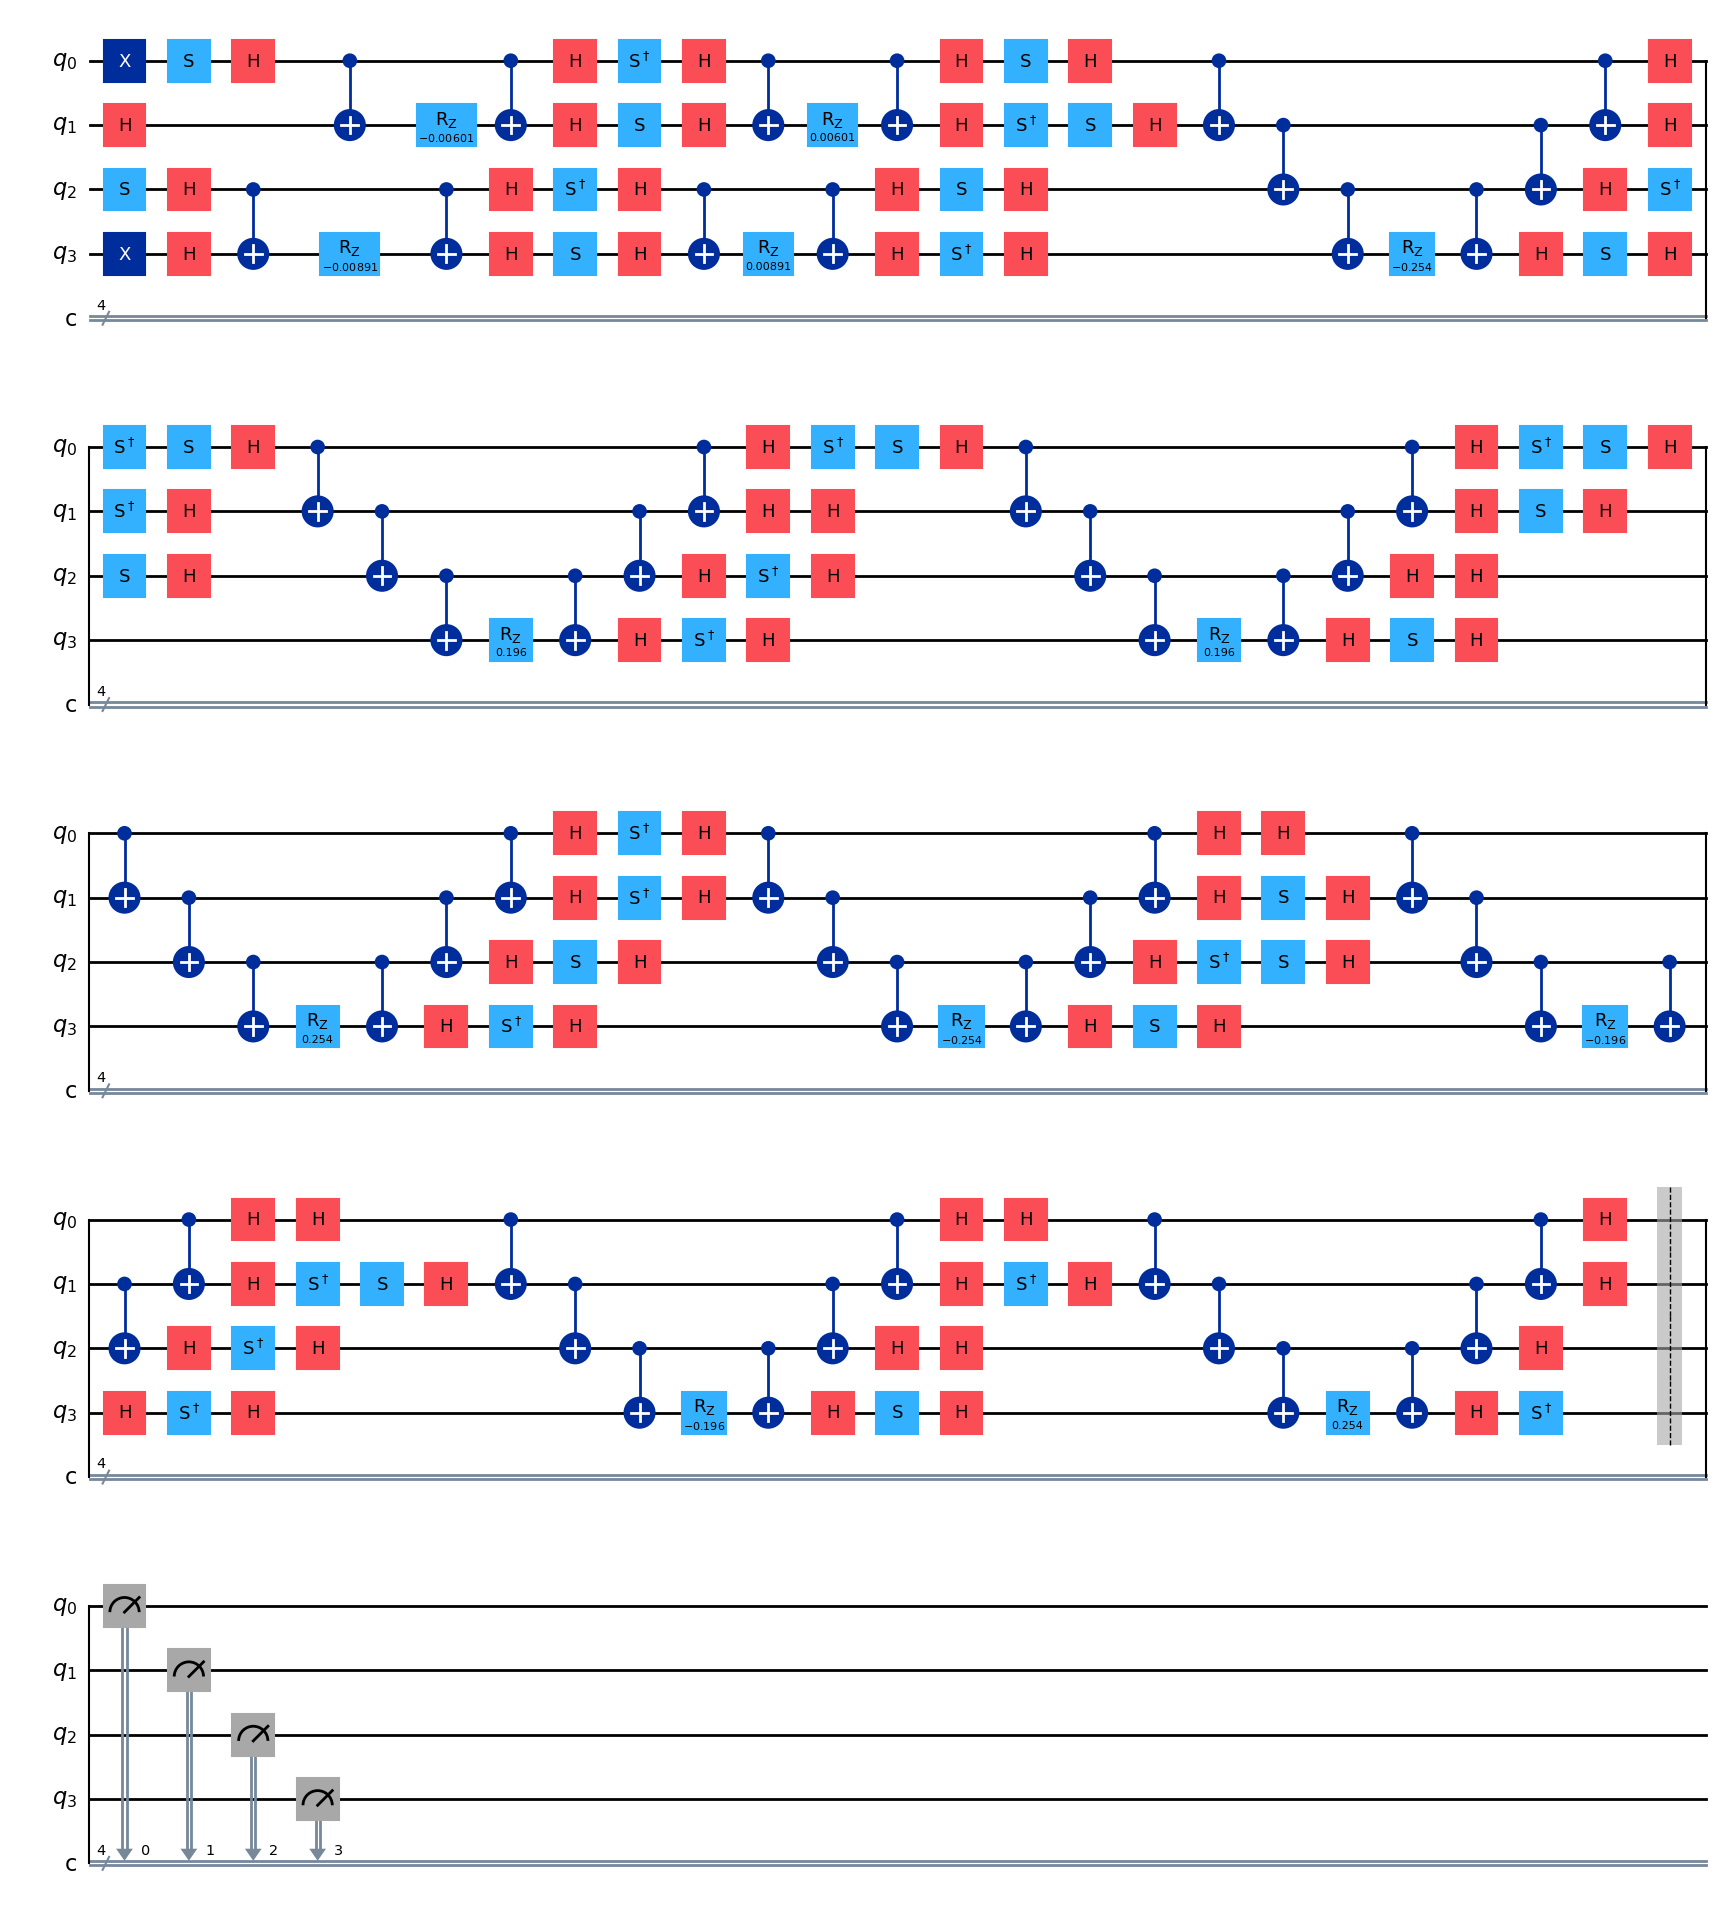

In [ ]:
import numpy as np
from pyscf import gto, scf
from qiskit import QuantumCircuit
from qiskit_aer import AerProvider
from qc_practice import SSVQE
from qc_practice.ansatz import SpinFlipUCCSD
from qc_practice.profile import Profile

mol = gto.M(atom = 'H 0 0 0; H 0 0 0.74', basis = 'sto-3g')
rhf = scf.RHF(mol)
profile = Profile()
profile.num_orb = rhf.get_hcore().shape[0]
profile.num_elec = mol.nelectron

ssvqe = SSVQE(mol)
ssvqe.ansatz = SpinFlipUCCSD()
coeff = [0.01201245,  0.01782515, -0.23119888,  1.79793851]
qc = QuantumCircuit(4, 4)
qc.x(0)
qc.x(3)

ssvqe._circuit(qc, SpinFlipUCCSD().ansatz(profile, coeff))
qc.barrier()
for k in range(4):
    qc.measure(k, k)

qc.draw('mpl')
# shots = 100000
# backend = AerProvider().get_backend('qasm_simulator')
# result = backend.run(qc, shots=shots).result().get_counts()
# print(result)

# spin = 0
# for key, value in result.items():
#     for i, orb in enumerate(reversed([*key])):
#         if i < 2:
#             spin += value * int(orb)
#         else:
#             spin -= value * int(orb)

# print(f'multiplicity: {abs(spin/shots/2)}')

4. VQD test

In [1]:
from pyscf import gto
from qc_practice import VQD
from qc_practice.ansatz import UCCSD, UpCCGSD
from qc_practice.simulator import QASM

mol = gto.M(atom = 'H 0 0 0; H 0 0 0.7', basis = 'sto-3g')
vqd = VQD(mol)
vqd.ansatz = UCCSD()
vqd.simulator = QASM(shots = 10000)

vqd.nstates = 4

vqd.parallel = True
vqd.run()

AttributeError: 'VQD' object has no attribute '_talk'

6. State vector simulator

Statevector([ 9.23879533e-01+0.00000000e+00j,
             -1.73298815e-17+0.00000000e+00j,
              0.00000000e+00-3.82683432e-01j,
              0.00000000e+00+4.10499320e-18j],
            dims=(2, 2))
[1.-6.123234e-17j 0.+0.000000e+00j 0.-0.000000e+00j 0.+0.000000e+00j]
1.0


/tmp/ipykernel_30840/520404141.py:25: DeprecationWarning: The class ``qiskit.providers.provider.Provider`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.
  backend = AerProvider().get_backend('statevector_simulator')


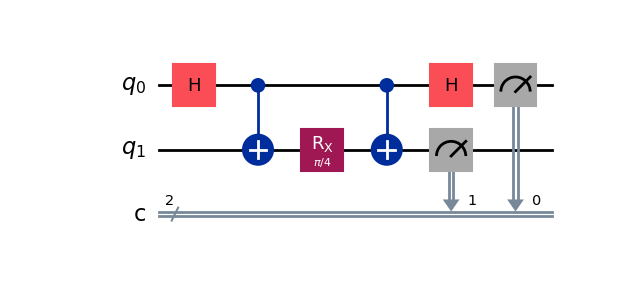

In [ ]:
%matplotlib widget
from qiskit import QuantumCircuit
from qiskit_aer import AerProvider
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# 회로 정의
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.h(0)

print(Statevector(qc))

qc.measure([0, 1], [0, 1])

qc.draw('mpl')

# shots 정의
shots = 1024

# statevector_simulator 사용
backend = AerProvider().get_backend('statevector_simulator')
result = backend.run(qc).result()

# 상태 벡터 가져오기
statevector = np.asarray(result.get_statevector())
print(statevector)

counts = 0
for i, amplitude in enumerate(statevector):
    binary_state = format(i, '0{}b'.format(len(qc.qubits)))
    parity = (-1) ** sum(int(bit) for bit in binary_state)
    probability = np.abs(amplitude) ** 2
    counts += parity * probability

# 기대값 출력
print(counts)
